In [1]:
# Imports
import pandas as pd
import numpy as np
from pathlib import Path
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Select which features/columns to include in ML Model feature set
# Select which "derived" features to include in ML Model feature set

# Select crypto assets interested in evaluating
INCLUDE_BTEC = True
INCLUDE_ETH = False
INCLUDE_ADA = False

# Select the orderbook timeframe's interested in
INCLUDE_5MIN_DATA = True
INCLUDE_1MIN_DATA = True
INCLUDE_1SEC_DATA = False

NUM_ORDER_BOOK_LEVELS = 15

In [3]:
TURN_ON_PRINT_DEBUG = True

In [4]:
# Setting these options will allow for reviewing more of the DataFrames
pd.set_option('display.max_columns', 200)

### Import the DERIVED Crytpo Order Book Data

In [5]:
# dictionary to store crypto dataframes {BTEC, ETH, ADA}, {5min, 1min, 1sec}
crypto_ob_df_dict = {} 

# Based on the selection critero, read the csv crypto order book csv files into the dictrionary
if (INCLUDE_5MIN_DATA):
    if (INCLUDE_BTEC):
        crypto_ob_df_dict["crypto_BTC_5min"] = pd.read_csv(
            Path("./derived_data/crypto_BTC_5min.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
            )
    if (INCLUDE_ETH):
        crypto_ob_df_dict["crypto_ETH_5min"] = pd.read_csv(
            Path("./derived_data/crypto_ETH_5min.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
        )
    if (INCLUDE_ADA):
        crypto_ob_df_dict["crypto_ADA_5min"] = pd.read_csv(
            Path("./derived_data/crypto_ADA_5min.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
        )
    
if (INCLUDE_1MIN_DATA):
    if (INCLUDE_BTEC):
        crypto_ob_df_dict["crypto_BTC_1min"] = pd.read_csv(
            Path("./derived_data/crypto_BTC_1min.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
            )
    if (INCLUDE_ETH):
        crypto_ob_df_dict["crypto_ETH_1min"] = pd.read_csv(
            Path("./derived_data/crypto_ETH_1min.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
        )
    if (INCLUDE_ADA):
        crypto_ob_df_dict["crypto_ADA_1min"] = pd.read_csv(
            Path("./derived_data/crypto_ADA_1min.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
        )
    
if (INCLUDE_1SEC_DATA):
    if (INCLUDE_BTEC):
        crypto_ob_df_dict["crypto_BTC_1sec"] = pd.read_csv(
            Path("./derived_data/crypto_BTC_1sec.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
            )
    if (INCLUDE_ETH):
        crypto_ob_df_dict["crypto_ETH_1sec"] = pd.read_csv(
            Path("./derived_data/crypto_ETH_1sec.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
        )
    if (INCLUDE_ADA):
        crypto_ob_df_dict["crypto_ADA_1sec"] = pd.read_csv(
            Path("./derived_data/crypto_ADA_1sec.csv"), 
            index_col='system_time', 
            infer_datetime_format=True, 
            parse_dates=True
        )    

In [6]:
# Debug data checkpoint

if (TURN_ON_PRINT_DEBUG):
    display(crypto_ob_df_dict.keys())
    
    for crypto_ob_key in crypto_ob_df_dict: 
        print(f"\nDebug {crypto_ob_key} derived dataframe:")
        display(crypto_ob_df_dict[crypto_ob_key].shape)
        display(crypto_ob_df_dict[crypto_ob_key].head(n=5))

dict_keys(['crypto_BTC_5min', 'crypto_BTC_1min'])


Debug crypto_BTC_5min derived dataframe:


(3367, 200)

,midpoint,spread,buys,sells,buys_sells_imbalance,bids_distance_0,bids_price_0,bids_limit_quantity_0,bids_limit_cum_quantity_0,bids_limit_notional_0,bids_limit_cum_notional_0,asks_distance_0,asks_price_0,asks_limit_quantity_0,asks_limit_cum_quantity_0,asks_limit_notional_0,bids_asks_imbalance_limit_notional_0,asks_limit_cum_notional_0,bids_distance_1,bids_price_1,bids_limit_quantity_1,bids_limit_cum_quantity_1,bids_limit_notional_1,bids_limit_cum_notional_1,asks_distance_1,asks_price_1,asks_limit_quantity_1,asks_limit_cum_quantity_1,asks_limit_notional_1,bids_asks_imbalance_limit_notional_1,asks_limit_cum_notional_1,bids_distance_2,bids_price_2,bids_limit_quantity_2,bids_limit_cum_quantity_2,bids_limit_notional_2,bids_limit_cum_notional_2,asks_distance_2,asks_price_2,asks_limit_quantity_2,asks_limit_cum_quantity_2,asks_limit_notional_2,bids_asks_imbalance_limit_notional_2,asks_limit_cum_notional_2,bids_distance_3,bids_price_3,bids_limit_quantity_3,bids_limit_cum_quantity_3,bids_limit_notional_3,bids_limit_cum_notional_3,asks_distance_3,asks_price_3,asks_limit_quantity_3,asks_limit_cum_quantity_3,asks_limit_notional_3,bids_asks_imbalance_limit_notional_3,asks_limit_cum_notional_3,bids_distance_4,bids_price_4,bids_limit_quantity_4,bids_limit_cum_quantity_4,bids_limit_notional_4,bids_limit_cum_notional_4,asks_distance_4,asks_price_4,asks_limit_quantity_4,asks_limit_cum_quantity_4,asks_limit_notional_4,bids_asks_imbalance_limit_notional_4,asks_limit_cum_notional_4,bids_distance_5,bids_price_5,bids_limit_quantity_5,bids_limit_cum_quantity_5,bids_limit_notional_5,bids_limit_cum_notional_5,asks_distance_5,asks_price_5,asks_limit_quantity_5,asks_limit_cum_quantity_5,asks_limit_notional_5,bids_asks_imbalance_limit_notional_5,asks_limit_cum_notional_5,bids_distance_6,bids_price_6,bids_limit_quantity_6,bids_limit_cum_quantity_6,bids_limit_notional_6,bids_limit_cum_notional_6,asks_distance_6,asks_price_6,asks_limit_quantity_6,asks_limit_cum_quantity_6,asks_limit_notional_6,bids_asks_imbalance_limit_notional_6,asks_limit_cum_notional_6,bids_distance_7,bids_price_7,bids_limit_quantity_7,bids_limit_cum_quantity_7,bids_limit_notional_7,bids_limit_cum_notional_7,asks_distance_7,asks_price_7,asks_limit_quantity_7,asks_limit_cum_quantity_7,asks_limit_notional_7,bids_asks_imbalance_limit_notional_7,asks_limit_cum_notional_7,bids_distance_8,bids_price_8,bids_limit_quantity_8,bids_limit_cum_quantity_8,bids_limit_notional_8,bids_limit_cum_notional_8,asks_distance_8,asks_price_8,asks_limit_quantity_8,asks_limit_cum_quantity_8,asks_limit_notional_8,bids_asks_imbalance_limit_notional_8,asks_limit_cum_notional_8,bids_distance_9,bids_price_9,bids_limit_quantity_9,bids_limit_cum_quantity_9,bids_limit_notional_9,bids_limit_cum_notional_9,asks_distance_9,asks_price_9,asks_limit_quantity_9,asks_limit_cum_quantity_9,asks_limit_notional_9,bids_asks_imbalance_limit_notional_9,asks_limit_cum_notional_9,bids_distance_10,bids_price_10,bids_limit_quantity_10,bids_limit_cum_quantity_10,bids_limit_notional_10,bids_limit_cum_notional_10,asks_distance_10,asks_price_10,asks_limit_quantity_10,asks_limit_cum_quantity_10,asks_limit_notional_10,bids_asks_imbalance_limit_notional_10,asks_limit_cum_notional_10,bids_distance_11,bids_price_11,bids_limit_quantity_11,bids_limit_cum_quantity_11,bids_limit_notional_11,bids_limit_cum_notional_11,asks_distance_11,asks_price_11,asks_limit_quantity_11,asks_limit_cum_quantity_11,asks_limit_notional_11,bids_asks_imbalance_limit_notional_11,asks_limit_cum_notional_11,bids_distance_12,bids_price_12,bids_limit_quantity_12,bids_limit_cum_quantity_12,bids_limit_notional_12,bids_limit_cum_notional_12,asks_distance_12,asks_price_12,asks_limit_quantity_12,asks_limit_cum_quantity_12,asks_limit_notional_12,bids_asks_imbalance_limit_notional_12,asks_limit_cum_notional_12,bids_distance_13,bids_price_13,bids_limit_quantity_13,bids_limit_cum_quantity_13,bids_limit_notional_13,bids_limit_cum_notional_13,asks_distance_13,asks_price_13,asks_limit_quantity


Debug crypto_BTC_1min derived dataframe:


(17113, 200)

,midpoint,spread,buys,sells,buys_sells_imbalance,bids_distance_0,bids_price_0,bids_limit_quantity_0,bids_limit_cum_quantity_0,bids_limit_notional_0,bids_limit_cum_notional_0,asks_distance_0,asks_price_0,asks_limit_quantity_0,asks_limit_cum_quantity_0,asks_limit_notional_0,bids_asks_imbalance_limit_notional_0,asks_limit_cum_notional_0,bids_distance_1,bids_price_1,bids_limit_quantity_1,bids_limit_cum_quantity_1,bids_limit_notional_1,bids_limit_cum_notional_1,asks_distance_1,asks_price_1,asks_limit_quantity_1,asks_limit_cum_quantity_1,asks_limit_notional_1,bids_asks_imbalance_limit_notional_1,asks_limit_cum_notional_1,bids_distance_2,bids_price_2,bids_limit_quantity_2,bids_limit_cum_quantity_2,bids_limit_notional_2,bids_limit_cum_notional_2,asks_distance_2,asks_price_2,asks_limit_quantity_2,asks_limit_cum_quantity_2,asks_limit_notional_2,bids_asks_imbalance_limit_notional_2,asks_limit_cum_notional_2,bids_distance_3,bids_price_3,bids_limit_quantity_3,bids_limit_cum_quantity_3,bids_limit_notional_3,bids_limit_cum_notional_3,asks_distance_3,asks_price_3,asks_limit_quantity_3,asks_limit_cum_quantity_3,asks_limit_notional_3,bids_asks_imbalance_limit_notional_3,asks_limit_cum_notional_3,bids_distance_4,bids_price_4,bids_limit_quantity_4,bids_limit_cum_quantity_4,bids_limit_notional_4,bids_limit_cum_notional_4,asks_distance_4,asks_price_4,asks_limit_quantity_4,asks_limit_cum_quantity_4,asks_limit_notional_4,bids_asks_imbalance_limit_notional_4,asks_limit_cum_notional_4,bids_distance_5,bids_price_5,bids_limit_quantity_5,bids_limit_cum_quantity_5,bids_limit_notional_5,bids_limit_cum_notional_5,asks_distance_5,asks_price_5,asks_limit_quantity_5,asks_limit_cum_quantity_5,asks_limit_notional_5,bids_asks_imbalance_limit_notional_5,asks_limit_cum_notional_5,bids_distance_6,bids_price_6,bids_limit_quantity_6,bids_limit_cum_quantity_6,bids_limit_notional_6,bids_limit_cum_notional_6,asks_distance_6,asks_price_6,asks_limit_quantity_6,asks_limit_cum_quantity_6,asks_limit_notional_6,bids_asks_imbalance_limit_notional_6,asks_limit_cum_notional_6,bids_distance_7,bids_price_7,bids_limit_quantity_7,bids_limit_cum_quantity_7,bids_limit_notional_7,bids_limit_cum_notional_7,asks_distance_7,asks_price_7,asks_limit_quantity_7,asks_limit_cum_quantity_7,asks_limit_notional_7,bids_asks_imbalance_limit_notional_7,asks_limit_cum_notional_7,bids_distance_8,bids_price_8,bids_limit_quantity_8,bids_limit_cum_quantity_8,bids_limit_notional_8,bids_limit_cum_notional_8,asks_distance_8,asks_price_8,asks_limit_quantity_8,asks_limit_cum_quantity_8,asks_limit_notional_8,bids_asks_imbalance_limit_notional_8,asks_limit_cum_notional_8,bids_distance_9,bids_price_9,bids_limit_quantity_9,bids_limit_cum_quantity_9,bids_limit_notional_9,bids_limit_cum_notional_9,asks_distance_9,asks_price_9,asks_limit_quantity_9,asks_limit_cum_quantity_9,asks_limit_notional_9,bids_asks_imbalance_limit_notional_9,asks_limit_cum_notional_9,bids_distance_10,bids_price_10,bids_limit_quantity_10,bids_limit_cum_quantity_10,bids_limit_notional_10,bids_limit_cum_notional_10,asks_distance_10,asks_price_10,asks_limit_quantity_10,asks_limit_cum_quantity_10,asks_limit_notional_10,bids_asks_imbalance_limit_notional_10,asks_limit_cum_notional_10,bids_distance_11,bids_price_11,bids_limit_quantity_11,bids_limit_cum_quantity_11,bids_limit_notional_11,bids_limit_cum_notional_11,asks_distance_11,asks_price_11,asks_limit_quantity_11,asks_limit_cum_quantity_11,asks_limit_notional_11,bids_asks_imbalance_limit_notional_11,asks_limit_cum_notional_11,bids_distance_12,bids_price_12,bids_limit_quantity_12,bids_limit_cum_quantity_12,bids_limit_notional_12,bids_limit_cum_notional_12,asks_distance_12,asks_price_12,asks_limit_quantity_12,asks_limit_cum_quantity_12,asks_limit_notional_12,bids_asks_imbalance_limit_notional_12,asks_limit_cum_notional_12,bids_distance_13,bids_price_13,bids_limit_quantity_13,bids_limit_cum_quantity_13,bids_limit_notional_13,bids_limit_cum_notional_13,asks_distance_13,asks_price_13,asks_limit_quantity

### Create the labels set (`y`)  from the “midpoint price” column, and then create the features (`X`) DataFrame from the remaining columns.

In [7]:
# Select which crypto order book data file to analyze
crypto_sel_df = crypto_ob_df_dict["crypto_BTC_5min"]

In [8]:
# Confirm all numerical data
crypto_sel_df.dtypes

midpoint                                 float64
spread                                   float64
buys                                     float64
sells                                    float64
buys_sells_imbalance                     float64
                                          ...   
asks_limit_quantity_14                   float64
asks_limit_cum_quantity_14               float64
asks_limit_notional_14                   float64
bids_asks_imbalance_limit_notional_14    float64
asks_limit_cum_notional_14               float64
Length: 200, dtype: object

In [9]:
# Find the location of the "midpoint" column, and initialize the "Signal" to 0 (to be placed next the midpotint column entry)
midpoint_column_index = crypto_ob_df_dict[crypto_ob_key].columns.get_loc("midpoint")
if 'Signal' in crypto_sel_df.columns:
    crypto_sel_df["Signal"] = 0.0
else:
    crypto_sel_df.insert(midpoint_column_index+1, "Signal", 0.0)        

# If the buys_sells_imbalance increases, set Signal to +1, else if it decreases, set to 0
crypto_sel_df.loc[(crypto_sel_df['buys_sells_imbalance'].shift(-1) >= crypto_sel_df['buys_sells_imbalance']), 'Signal'] = 1
crypto_sel_df.loc[(crypto_sel_df['buys_sells_imbalance'].shift(-1) < crypto_sel_df['buys_sells_imbalance']), 'Signal'] = 0

# drop the last row (don't know if the next row midpoint went up or down)
crypto_sel_df.drop(index=crypto_sel_df.index[-1],axis=0,inplace=True)

# Review the DataFrame
display(crypto_sel_df.shape)
display(crypto_sel_df.head(n=10))
display(crypto_sel_df.tail(n=10))

(3366, 201)

,midpoint,Signal,spread,buys,sells,buys_sells_imbalance,bids_distance_0,bids_price_0,bids_limit_quantity_0,bids_limit_cum_quantity_0,bids_limit_notional_0,bids_limit_cum_notional_0,asks_distance_0,asks_price_0,asks_limit_quantity_0,asks_limit_cum_quantity_0,asks_limit_notional_0,bids_asks_imbalance_limit_notional_0,asks_limit_cum_notional_0,bids_distance_1,bids_price_1,bids_limit_quantity_1,bids_limit_cum_quantity_1,bids_limit_notional_1,bids_limit_cum_notional_1,asks_distance_1,asks_price_1,asks_limit_quantity_1,asks_limit_cum_quantity_1,asks_limit_notional_1,bids_asks_imbalance_limit_notional_1,asks_limit_cum_notional_1,bids_distance_2,bids_price_2,bids_limit_quantity_2,bids_limit_cum_quantity_2,bids_limit_notional_2,bids_limit_cum_notional_2,asks_distance_2,asks_price_2,asks_limit_quantity_2,asks_limit_cum_quantity_2,asks_limit_notional_2,bids_asks_imbalance_limit_notional_2,asks_limit_cum_notional_2,bids_distance_3,bids_price_3,bids_limit_quantity_3,bids_limit_cum_quantity_3,bids_limit_notional_3,bids_limit_cum_notional_3,asks_distance_3,asks_price_3,asks_limit_quantity_3,asks_limit_cum_quantity_3,asks_limit_notional_3,bids_asks_imbalance_limit_notional_3,asks_limit_cum_notional_3,bids_distance_4,bids_price_4,bids_limit_quantity_4,bids_limit_cum_quantity_4,bids_limit_notional_4,bids_limit_cum_notional_4,asks_distance_4,asks_price_4,asks_limit_quantity_4,asks_limit_cum_quantity_4,asks_limit_notional_4,bids_asks_imbalance_limit_notional_4,asks_limit_cum_notional_4,bids_distance_5,bids_price_5,bids_limit_quantity_5,bids_limit_cum_quantity_5,bids_limit_notional_5,bids_limit_cum_notional_5,asks_distance_5,asks_price_5,asks_limit_quantity_5,asks_limit_cum_quantity_5,asks_limit_notional_5,bids_asks_imbalance_limit_notional_5,asks_limit_cum_notional_5,bids_distance_6,bids_price_6,bids_limit_quantity_6,bids_limit_cum_quantity_6,bids_limit_notional_6,bids_limit_cum_notional_6,asks_distance_6,asks_price_6,asks_limit_quantity_6,asks_limit_cum_quantity_6,asks_limit_notional_6,bids_asks_imbalance_limit_notional_6,asks_limit_cum_notional_6,bids_distance_7,bids_price_7,bids_limit_quantity_7,...,bids_limit_notional_7,bids_limit_cum_notional_7,asks_distance_7,asks_price_7,asks_limit_quantity_7,asks_limit_cum_quantity_7,asks_limit_notional_7,bids_asks_imbalance_limit_notional_7,asks_limit_cum_notional_7,bids_distance_8,bids_price_8,bids_limit_quantity_8,bids_limit_cum_quantity_8,bids_limit_notional_8,bids_limit_cum_notional_8,asks_distance_8,asks_price_8,asks_limit_quantity_8,asks_limit_cum_quantity_8,asks_limit_notional_8,bids_asks_imbalance_limit_notional_8,asks_limit_cum_notional_8,bids_distance_9,bids_price_9,bids_limit_quantity_9,bids_limit_cum_quantity_9,bids_limit_notional_9,bids_limit_cum_notional_9,asks_distance_9,asks_price_9,asks_limit_quantity_9,asks_limit_cum_quantity_9,asks_limit_notional_9,bids_asks_imbalance_limit_notional_9,asks_limit_cum_notional_9,bids_distance_10,bids_price_10,bids_limit_quantity_10,bids_limit_cum_quantity_10,bids_limit_notional_10,bids_limit_cum_notional_10,asks_distance_10,asks_price_10,asks_limit_quantity_10,asks_limit_cum_quantity_10,asks_limit_notional_10,bids_asks_imbalance_limit_notional_10,asks_limit_cum_notional_10,bids_distance_11,bids_price_11,bids_limit_quantity_11,bids_limit_cum_quantity_11,bids_limit_notional_11,bids_limit_cum_notional_11,asks_distance_11,asks_price_11,asks_limit_quantity_11,asks_limit_cum_quantity_11,asks_limit_notional_11,bids_asks_imbalance_limit_notional_11,asks_limit_cum_notional_11,bids_distance_12,bids_price_12,bids_limit_quantity_12,bids_limit_cum_quantity_12,bids_limit_notional_12,bids_limit_cum_notional_12,asks_distance_12,asks_price_12,asks_limit_quantity_12,asks_limit_cum_quantity_12,asks_limit_notional_12,bids_asks_imbalance_limit_notional_12,asks_limit_cum_notional_12,bids_distance_13,bids_price_13,bids_limit_quantity_13,bids_limit_cum_quantity_13,bids_limit_notional_13,bids_limit_cum_notional_13,asks_distance_13,asks_price_13,asks_limit_quantity_13,asks_limit_

,midpoint,Signal,spread,buys,sells,buys_sells_imbalance,bids_distance_0,bids_price_0,bids_limit_quantity_0,bids_limit_cum_quantity_0,bids_limit_notional_0,bids_limit_cum_notional_0,asks_distance_0,asks_price_0,asks_limit_quantity_0,asks_limit_cum_quantity_0,asks_limit_notional_0,bids_asks_imbalance_limit_notional_0,asks_limit_cum_notional_0,bids_distance_1,bids_price_1,bids_limit_quantity_1,bids_limit_cum_quantity_1,bids_limit_notional_1,bids_limit_cum_notional_1,asks_distance_1,asks_price_1,asks_limit_quantity_1,asks_limit_cum_quantity_1,asks_limit_notional_1,bids_asks_imbalance_limit_notional_1,asks_limit_cum_notional_1,bids_distance_2,bids_price_2,bids_limit_quantity_2,bids_limit_cum_quantity_2,bids_limit_notional_2,bids_limit_cum_notional_2,asks_distance_2,asks_price_2,asks_limit_quantity_2,asks_limit_cum_quantity_2,asks_limit_notional_2,bids_asks_imbalance_limit_notional_2,asks_limit_cum_notional_2,bids_distance_3,bids_price_3,bids_limit_quantity_3,bids_limit_cum_quantity_3,bids_limit_notional_3,bids_limit_cum_notional_3,asks_distance_3,asks_price_3,asks_limit_quantity_3,asks_limit_cum_quantity_3,asks_limit_notional_3,bids_asks_imbalance_limit_notional_3,asks_limit_cum_notional_3,bids_distance_4,bids_price_4,bids_limit_quantity_4,bids_limit_cum_quantity_4,bids_limit_notional_4,bids_limit_cum_notional_4,asks_distance_4,asks_price_4,asks_limit_quantity_4,asks_limit_cum_quantity_4,asks_limit_notional_4,bids_asks_imbalance_limit_notional_4,asks_limit_cum_notional_4,bids_distance_5,bids_price_5,bids_limit_quantity_5,bids_limit_cum_quantity_5,bids_limit_notional_5,bids_limit_cum_notional_5,asks_distance_5,asks_price_5,asks_limit_quantity_5,asks_limit_cum_quantity_5,asks_limit_notional_5,bids_asks_imbalance_limit_notional_5,asks_limit_cum_notional_5,bids_distance_6,bids_price_6,bids_limit_quantity_6,bids_limit_cum_quantity_6,bids_limit_notional_6,bids_limit_cum_notional_6,asks_distance_6,asks_price_6,asks_limit_quantity_6,asks_limit_cum_quantity_6,asks_limit_notional_6,bids_asks_imbalance_limit_notional_6,asks_limit_cum_notional_6,bids_distance_7,bids_price_7,bids_limit_quantity_7,...,bids_limit_notional_7,bids_limit_cum_notional_7,asks_distance_7,asks_price_7,asks_limit_quantity_7,asks_limit_cum_quantity_7,asks_limit_notional_7,bids_asks_imbalance_limit_notional_7,asks_limit_cum_notional_7,bids_distance_8,bids_price_8,bids_limit_quantity_8,bids_limit_cum_quantity_8,bids_limit_notional_8,bids_limit_cum_notional_8,asks_distance_8,asks_price_8,asks_limit_quantity_8,asks_limit_cum_quantity_8,asks_limit_notional_8,bids_asks_imbalance_limit_notional_8,asks_limit_cum_notional_8,bids_distance_9,bids_price_9,bids_limit_quantity_9,bids_limit_cum_quantity_9,bids_limit_notional_9,bids_limit_cum_notional_9,asks_distance_9,asks_price_9,asks_limit_quantity_9,asks_limit_cum_quantity_9,asks_limit_notional_9,bids_asks_imbalance_limit_notional_9,asks_limit_cum_notional_9,bids_distance_10,bids_price_10,bids_limit_quantity_10,bids_limit_cum_quantity_10,bids_limit_notional_10,bids_limit_cum_notional_10,asks_distance_10,asks_price_10,asks_limit_quantity_10,asks_limit_cum_quantity_10,asks_limit_notional_10,bids_asks_imbalance_limit_notional_10,asks_limit_cum_notional_10,bids_distance_11,bids_price_11,bids_limit_quantity_11,bids_limit_cum_quantity_11,bids_limit_notional_11,bids_limit_cum_notional_11,asks_distance_11,asks_price_11,asks_limit_quantity_11,asks_limit_cum_quantity_11,asks_limit_notional_11,bids_asks_imbalance_limit_notional_11,asks_limit_cum_notional_11,bids_distance_12,bids_price_12,bids_limit_quantity_12,bids_limit_cum_quantity_12,bids_limit_notional_12,bids_limit_cum_notional_12,asks_distance_12,asks_price_12,asks_limit_quantity_12,asks_limit_cum_quantity_12,asks_limit_notional_12,bids_asks_imbalance_limit_notional_12,asks_limit_cum_notional_12,bids_distance_13,bids_price_13,bids_limit_quantity_13,bids_limit_cum_quantity_13,bids_limit_notional_13,bids_limit_cum_notional_13,asks_distance_13,asks_price_13,asks_limit_quantity_13,asks_limit_

In [10]:
# Separate the data into labels and features

# Separate the y variable, the labels
y_srs = crypto_sel_df['Signal']

# Separate the X variable, the features
X_df = crypto_sel_df.drop(columns='Signal')

In [11]:
# Review the y variable Series
print("Target set to be used for ML models")
display(type(y_srs))
display(y_srs)

Target set to be used for ML models


pandas.core.series.Series

system_time
2021-04-07 11:37:41.122161+00:00    1.0
2021-04-07 11:42:41.122161+00:00    0.0
2021-04-07 11:47:41.122161+00:00    1.0
2021-04-07 11:52:41.122161+00:00    0.0
2021-04-07 11:57:41.122161+00:00    1.0
                                   ... 
2021-04-19 09:25:00.386544+00:00    1.0
2021-04-19 09:30:00.386544+00:00    1.0
2021-04-19 09:35:00.386544+00:00    0.0
2021-04-19 09:40:00.386544+00:00    0.0
2021-04-19 09:45:00.386544+00:00    1.0
Name: Signal, Length: 3366, dtype: float64

In [12]:
# Review the X variable DataFrame
print("Feature set DataFrame be used for ML models")
display(X_df.shape)
display(X_df)

Feature set DataFrame be used for ML models


(3366, 200)

,midpoint,spread,buys,sells,buys_sells_imbalance,bids_distance_0,bids_price_0,bids_limit_quantity_0,bids_limit_cum_quantity_0,bids_limit_notional_0,bids_limit_cum_notional_0,asks_distance_0,asks_price_0,asks_limit_quantity_0,asks_limit_cum_quantity_0,asks_limit_notional_0,bids_asks_imbalance_limit_notional_0,asks_limit_cum_notional_0,bids_distance_1,bids_price_1,bids_limit_quantity_1,bids_limit_cum_quantity_1,bids_limit_notional_1,bids_limit_cum_notional_1,asks_distance_1,asks_price_1,asks_limit_quantity_1,asks_limit_cum_quantity_1,asks_limit_notional_1,bids_asks_imbalance_limit_notional_1,asks_limit_cum_notional_1,bids_distance_2,bids_price_2,bids_limit_quantity_2,bids_limit_cum_quantity_2,bids_limit_notional_2,bids_limit_cum_notional_2,asks_distance_2,asks_price_2,asks_limit_quantity_2,asks_limit_cum_quantity_2,asks_limit_notional_2,bids_asks_imbalance_limit_notional_2,asks_limit_cum_notional_2,bids_distance_3,bids_price_3,bids_limit_quantity_3,bids_limit_cum_quantity_3,bids_limit_notional_3,bids_limit_cum_notional_3,asks_distance_3,asks_price_3,asks_limit_quantity_3,asks_limit_cum_quantity_3,asks_limit_notional_3,bids_asks_imbalance_limit_notional_3,asks_limit_cum_notional_3,bids_distance_4,bids_price_4,bids_limit_quantity_4,bids_limit_cum_quantity_4,bids_limit_notional_4,bids_limit_cum_notional_4,asks_distance_4,asks_price_4,asks_limit_quantity_4,asks_limit_cum_quantity_4,asks_limit_notional_4,bids_asks_imbalance_limit_notional_4,asks_limit_cum_notional_4,bids_distance_5,bids_price_5,bids_limit_quantity_5,bids_limit_cum_quantity_5,bids_limit_notional_5,bids_limit_cum_notional_5,asks_distance_5,asks_price_5,asks_limit_quantity_5,asks_limit_cum_quantity_5,asks_limit_notional_5,bids_asks_imbalance_limit_notional_5,asks_limit_cum_notional_5,bids_distance_6,bids_price_6,bids_limit_quantity_6,bids_limit_cum_quantity_6,bids_limit_notional_6,bids_limit_cum_notional_6,asks_distance_6,asks_price_6,asks_limit_quantity_6,asks_limit_cum_quantity_6,asks_limit_notional_6,bids_asks_imbalance_limit_notional_6,asks_limit_cum_notional_6,bids_distance_7,bids_price_7,bids_limit_quantity_7,bids_limit_cum_quantity_7,bids_limit_notional_7,bids_limit_cum_notional_7,asks_distance_7,asks_price_7,asks_limit_quantity_7,asks_limit_cum_quantity_7,asks_limit_notional_7,bids_asks_imbalance_limit_notional_7,asks_limit_cum_notional_7,bids_distance_8,bids_price_8,bids_limit_quantity_8,bids_limit_cum_quantity_8,bids_limit_notional_8,bids_limit_cum_notional_8,asks_distance_8,asks_price_8,asks_limit_quantity_8,asks_limit_cum_quantity_8,asks_limit_notional_8,bids_asks_imbalance_limit_notional_8,asks_limit_cum_notional_8,bids_distance_9,bids_price_9,bids_limit_quantity_9,bids_limit_cum_quantity_9,bids_limit_notional_9,bids_limit_cum_notional_9,asks_distance_9,asks_price_9,asks_limit_quantity_9,asks_limit_cum_quantity_9,asks_limit_notional_9,bids_asks_imbalance_limit_notional_9,asks_limit_cum_notional_9,bids_distance_10,bids_price_10,bids_limit_quantity_10,bids_limit_cum_quantity_10,bids_limit_notional_10,bids_limit_cum_notional_10,asks_distance_10,asks_price_10,asks_limit_quantity_10,asks_limit_cum_quantity_10,asks_limit_notional_10,bids_asks_imbalance_limit_notional_10,asks_limit_cum_notional_10,bids_distance_11,bids_price_11,bids_limit_quantity_11,bids_limit_cum_quantity_11,bids_limit_notional_11,bids_limit_cum_notional_11,asks_distance_11,asks_price_11,asks_limit_quantity_11,asks_limit_cum_quantity_11,asks_limit_notional_11,bids_asks_imbalance_limit_notional_11,asks_limit_cum_notional_11,bids_distance_12,bids_price_12,bids_limit_quantity_12,bids_limit_cum_quantity_12,bids_limit_notional_12,bids_limit_cum_notional_12,asks_distance_12,asks_price_12,asks_limit_quantity_12,asks_limit_cum_quantity_12,asks_limit_notional_12,bids_asks_imbalance_limit_notional_12,asks_limit_cum_notional_12,bids_distance_13,bids_price_13,bids_limit_quantity_13,bids_limit_cum_quantity_13,bids_limit_notional_13,bids_limit_cum_notional_13,asks_distance_13,asks_price_13,asks_limit_quantity

### Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [13]:
# Check the balance of our target values
print("# of loan_status values that = 1 (midpoint price increased) and = 0 (midpoint price decreased)")
display(y_srs.value_counts())

# of loan_status values that = 1 (midpoint price increased) and = 0 (midpoint price decreased)


1.0    1685
0.0    1681
Name: Signal, dtype: int64

### Split the data into training and testing datasets

In [14]:
 # Split the data using 
train_index = int(X_df.shape[0] * 0.75) - 1
X_train_df = X_df.iloc[:train_index]
y_train_srs = y_srs.iloc[:train_index]
X_test_df = X_df.iloc[train_index:]
y_test_srs = y_srs.iloc[train_index:]
#X_train_df, X_test_df, y_train_srs, y_test_srs = train_test_split(X_df, y_srs, random_state=1)

In [15]:
# Data checkpoint
print("# of loan_status values that = 1 (midpoint price increased) and = 0 (midpoint price decreased) in the Training Set")
display(y_train_srs.value_counts())
print("# of loan_status values that = 1 (midpoint price increased) and = 0 (loan decreased) in the Target/Test Set")
display(y_test_srs.value_counts())

# of loan_status values that = 1 (midpoint price increased) and = 0 (midpoint price decreased) in the Training Set


1.0    1265
0.0    1258
Name: Signal, dtype: int64

# of loan_status values that = 1 (midpoint price increased) and = 0 (loan decreased) in the Target/Test Set


0.0    423
1.0    420
Name: Signal, dtype: int64

### Use scikit-learn's `StandardScaler` to scale the features data.

In [16]:
# Create a StandardScaler instance
standard_scaler_inst = StandardScaler()

# Fit the scaler to the features training dataset
X_train_scaler = standard_scaler_inst.fit(X_train_df)

# Fit the scaler to the features training dataset
X_train_scaled_npa = X_train_scaler.transform(X_train_df)
X_test_scaled_npa = X_train_scaler.transform(X_test_df)

In [17]:
# Data checkpoint
display(X_train_scaled_npa.shape)
display(X_test_scaled_npa.shape)

(2523, 200)

(843, 200)

In [18]:
# Convert back to dataframe (to make it easier to drop feature sets as part of evaluating different model permuations below)
X_train_scaled_df = pd.DataFrame(X_train_scaled_npa, columns = X_df.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled_npa, columns = X_df.columns)

In [19]:
# Data checkpoint
display(X_train_scaled_df.shape)
display(X_test_scaled_df.shape)

(2523, 200)

(843, 200)

## Compile and Evaluate a Binary Classification Model Using a Neural Network

In [20]:
# Define the the number of inputs (features) to the model
number_input_features = X_train_scaled_df.shape[1]

# Review the number of features
print("Number of input features = ", number_input_features)

Number of input features =  200


In [21]:
# Define the number of neurons in the output layer
number_output_neurons = 1

In [22]:
# Define the number of hidden nodes for the first hidden layer
num_hidden_nodes_layer1 =  (number_input_features + 1) // 2 

# Review the number hidden nodes in the first layer
print("Number of hidden nodes in layer 1 = ", num_hidden_nodes_layer1)

Number of hidden nodes in layer 1 =  100


In [23]:
# Define the number of hidden nodes for the second hidden layer
num_hidden_nodes_layer2 =  (num_hidden_nodes_layer1 + 1) // 2

# Review the number hidden nodes in the second layer
print("Number of hidden nodes in layer 2 = ", num_hidden_nodes_layer2)

Number of hidden nodes in layer 2 =  50


In [24]:
# Create the Sequential model instance
nn_sequential_original_model = Sequential()

In [25]:
# Add the first hidden layer
nn_sequential_original_model.add(Dense(units=num_hidden_nodes_layer1, activation="relu", input_dim=number_input_features))

In [26]:
# Add the second hidden layer
nn_sequential_original_model.add(Dense(units=num_hidden_nodes_layer2, activation="relu"))

In [27]:
# Add the output layer to the model specifying the number of output neurons and activation function
nn_sequential_original_model.add(Dense(units=number_output_neurons, activation="sigmoid"))

In [28]:
# Display the Sequential model summary
nn_sequential_original_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               20100     
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 25,201
Trainable params: 25,201
Non-trainable params: 0
_________________________________________________________________


### Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [29]:
# Compile the Sequential model
nn_sequential_original_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [30]:
# Fit the model using 50 epochs and the training data
nn_sequential_original_model_fit = nn_sequential_original_model.fit(X_train_scaled_df, y_train_srs, epochs=100)

Epoch 1/100
79/79 [==============================] - 0s 793us/step - loss: 0.6768 - accuracy: 0.5985
Epoch 2/100
79/79 [==============================] - 0s 793us/step - loss: 0.5673 - accuracy: 0.7134
Epoch 3/100
79/79 [==============================] - 0s 767us/step - loss: 0.5240 - accuracy: 0.7329
Epoch 4/100
79/79 [==============================] - 0s 767us/step - loss: 0.4945 - accuracy: 0.7551
Epoch 5/100
79/79 [==============================] - 0s 780us/step - loss: 0.4828 - accuracy: 0.7685
Epoch 6/100
79/79 [==============================] - 0s 754us/step - loss: 0.4660 - accuracy: 0.7772
Epoch 7/100
79/79 [==============================] - 0s 767us/step - loss: 0.4527 - accuracy: 0.7828
Epoch 8/100
79/79 [==============================] - 0s 754us/step - loss: 0.4467 - accuracy: 0.7903
Epoch 9/100
79/79 [==============================] - 0s 767us/step - loss: 0.4207 - accuracy: 0.8078
Epoch 10/100
79/79 [==============================] - 0s 767us/step - loss: 0.4101 - accura

In [31]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
nn_sequential_permutation_model_loss, nn_sequential_permutation_model_accuracy =  nn_sequential_original_model.evaluate(X_test_scaled_df,y_test_srs,verbose=2)

# Display the model loss and accuracy results
#print(f"Loss: {nn_sequential_permutation_model_loss}, Accuracy: {nn_sequential_permutation_model_accuracy}")
print(f"Accuracy: {nn_sequential_permutation_model_accuracy}")

27/27 - 0s - loss: 2.8270 - accuracy: 0.6595 - 113ms/epoch - 4ms/step
Accuracy: 0.6595492362976074


<AxesSubplot:>

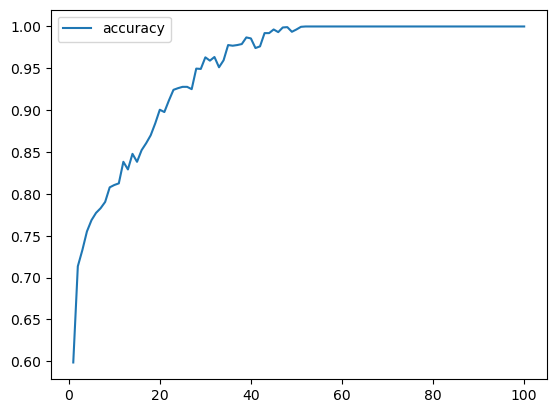

In [32]:
# Create a DataFrame using the model history and an index parameter
model_plot = pd.DataFrame(nn_sequential_original_model_fit.history, index=range(1, len(nn_sequential_original_model_fit.history["loss"]) + 1))

# Vizualize the model plot where the y-axis displays the loss metric
#model_plot.plot(y="loss")

# Vizualize the model plot where the y-axis displays the accuracy metric
model_plot.plot(y="accuracy")

,midpoint,spread,buys,sells,buys_sells_imbalance,bids_distance_0,bids_price_0,bids_limit_quantity_0,bids_limit_cum_quantity_0,bids_limit_notional_0,bids_limit_cum_notional_0,asks_distance_0,asks_price_0,asks_limit_quantity_0,asks_limit_cum_quantity_0,asks_limit_notional_0,bids_asks_imbalance_limit_notional_0,asks_limit_cum_notional_0,bids_distance_1,bids_price_1,bids_limit_quantity_1,bids_limit_cum_quantity_1,bids_limit_notional_1,bids_limit_cum_notional_1,asks_distance_1,asks_price_1,asks_limit_quantity_1,asks_limit_cum_quantity_1,asks_limit_notional_1,bids_asks_imbalance_limit_notional_1,asks_limit_cum_notional_1,bids_distance_2,bids_price_2,bids_limit_quantity_2,bids_limit_cum_quantity_2,bids_limit_notional_2,bids_limit_cum_notional_2,asks_distance_2,asks_price_2,asks_limit_quantity_2,asks_limit_cum_quantity_2,asks_limit_notional_2,bids_asks_imbalance_limit_notional_2,asks_limit_cum_notional_2,bids_distance_3,bids_price_3,bids_limit_quantity_3,bids_limit_cum_quantity_3,bids_limit_notional_3,bids_limit_cum_notional_3,asks_distance_3,asks_price_3,asks_limit_quantity_3,asks_limit_cum_quantity_3,asks_limit_notional_3,bids_asks_imbalance_limit_notional_3,asks_limit_cum_notional_3,bids_distance_4,bids_price_4,bids_limit_quantity_4,bids_limit_cum_quantity_4,bids_limit_notional_4,bids_limit_cum_notional_4,asks_distance_4,asks_price_4,asks_limit_quantity_4,asks_limit_cum_quantity_4,asks_limit_notional_4,bids_asks_imbalance_limit_notional_4,asks_limit_cum_notional_4,bids_distance_5,bids_price_5,bids_limit_quantity_5,bids_limit_cum_quantity_5,bids_limit_notional_5,bids_limit_cum_notional_5,asks_distance_5,asks_price_5,asks_limit_quantity_5,asks_limit_cum_quantity_5,asks_limit_notional_5,bids_asks_imbalance_limit_notional_5,asks_limit_cum_notional_5,bids_distance_6,bids_price_6,bids_limit_quantity_6,bids_limit_cum_quantity_6,bids_limit_notional_6,bids_limit_cum_notional_6,asks_distance_6,asks_price_6,asks_limit_quantity_6,asks_limit_cum_quantity_6,asks_limit_notional_6,bids_asks_imbalance_limit_notional_6,asks_limit_cum_notional_6,bids_distance_7,bids_price_7,bids_limit_quantity_7,bids_limit_cum_quantity_7,bids_limit_notional_7,bids_limit_cum_notional_7,asks_distance_7,asks_price_7,asks_limit_quantity_7,asks_limit_cum_quantity_7,asks_limit_notional_7,bids_asks_imbalance_limit_notional_7,asks_limit_cum_notional_7,bids_distance_8,bids_price_8,bids_limit_quantity_8,bids_limit_cum_quantity_8,bids_limit_notional_8,bids_limit_cum_notional_8,asks_distance_8,asks_price_8,asks_limit_quantity_8,asks_limit_cum_quantity_8,asks_limit_notional_8,bids_asks_imbalance_limit_notional_8,asks_limit_cum_notional_8,bids_distance_9,bids_price_9,bids_limit_quantity_9,bids_limit_cum_quantity_9,bids_limit_notional_9,bids_limit_cum_notional_9,asks_distance_9,asks_price_9,asks_limit_quantity_9,asks_limit_cum_quantity_9,asks_limit_notional_9,bids_asks_imbalance_limit_notional_9,asks_limit_cum_notional_9,bids_distance_10,bids_price_10,bids_limit_quantity_10,bids_limit_cum_quantity_10,bids_limit_notional_10,bids_limit_cum_notional_10,asks_distance_10,asks_price_10,asks_limit_quantity_10,asks_limit_cum_quantity_10,asks_limit_notional_10,bids_asks_imbalance_limit_notional_10,asks_limit_cum_notional_10,bids_distance_11,bids_price_11,bids_limit_quantity_11,bids_limit_cum_quantity_11,bids_limit_notional_11,bids_limit_cum_notional_11,asks_distance_11,asks_price_11,asks_limit_quantity_11,asks_limit_cum_quantity_11,asks_limit_notional_11,bids_asks_imbalance_limit_notional_11,asks_limit_cum_notional_11,bids_distance_12,bids_price_12,bids_limit_quantity_12,bids_limit_cum_quantity_12,bids_limit_notional_12,bids_limit_cum_notional_12,asks_distance_12,asks_price_12,asks_limit_quantity_12,asks_limit_cum_quantity_12,asks_limit_notional_12,bids_asks_imbalance_limit_notional_12,asks_limit_cum_notional_12,bids_distance_13,bids_price_13,bids_limit_quantity_13,bids_limit_cum_quantity_13,bids_limit_notional_13,bids_limit_cum_notional_13,asks_distance_13,asks_price_13,asks_limit_quantity

27/27 [==============================] - 0s 537us/step


,midpoint,bids_price_0,asks_price_0,Actual_Returns,y_test_srs,Signal,seq_pred_npa,Seq_Signal
1,60949.955,60949.95,60949.96,0.001184,0.0,-1.0,1.748124e-07,-1.0
2,60808.225,60808.22,60808.23,-0.002325,1.0,1.0,9.997528e-01,1.0
3,60751.635,60751.63,60751.64,-0.000931,1.0,1.0,9.912677e-01,1.0
4,60884.485,60884.48,60884.49,0.002187,0.0,-1.0,8.382319e-09,-1.0
5,60667.095,60667.09,60667.10,-0.003571,1.0,1.0,9.817013e-01,1.0


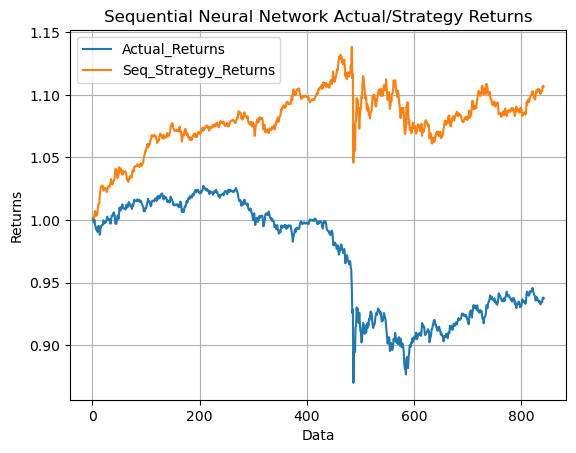

In [33]:
# Plot the cumulative returns from trasing strategies using machine learning

display(X_test_df)

predictions_df = X_test_df[["midpoint", "bids_price_0", "asks_price_0"]]
predictions_df["Actual_Returns"] = (predictions_df["midpoint"] - predictions_df["midpoint"].shift(1)) / predictions_df["midpoint"].shift(1)

predictions_df["y_test_srs"] = y_test_srs
predictions_df.loc[(predictions_df["y_test_srs"] >= 0.5), 'Signal'] = +1
predictions_df.loc[(predictions_df["y_test_srs"] < 0.5), 'Signal'] = -1

seq_pred_npa = nn_sequential_original_model.predict(X_test_scaled_df)
predictions_df["seq_pred_npa"] = seq_pred_npa
predictions_df.loc[(predictions_df["seq_pred_npa"] >= 0.5), 'Seq_Signal'] = +1
predictions_df.loc[(predictions_df["seq_pred_npa"] < 0.5), 'Seq_Signal'] = -1

predictions_df.reset_index(drop=True, inplace=True)

# Since shifted the signals down by 1 day, the first entry will be Nan, dropit
predictions_df.dropna(inplace=True)

display(predictions_df.head())

# Add the strategy returns to the DataFrame
# Shifting signal column ... 
#    deciding what the signal will be on day N
#    Buying/Selling stock the "next" day (day N+1)
#    Therefore, strategy returns are computed for next day (N+1)
predictions_df['Seq_Strategy_Returns'] = predictions_df['Actual_Returns'] * predictions_df['Seq_Signal'].shift(1)
(1 + predictions_df[['Actual_Returns', 'Seq_Strategy_Returns']]).cumprod().plot(title="Sequential Neural Network Actual/Strategy Returns", xlabel="Data", ylabel="Returns").grid()
